In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
titanic = pd.read_csv("./data/titanic.csv")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
# We won't use all the data here
titanic.drop(columns=['name'], inplace=True)
titanic.drop(columns=['ticket'], inplace=True)
titanic.drop(columns=['boat'], inplace=True)
titanic.drop(columns=['body'], inplace=True)
titanic.drop(columns=['home.dest'], inplace=True)

In [4]:
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,female,29.00,0,0,211.3375,B5,S
1,1,1,male,0.92,1,2,151.5500,C22 C26,S
2,1,0,female,2.00,1,2,151.5500,C22 C26,S
3,1,0,male,30.00,1,2,151.5500,C22 C26,S
4,1,0,female,25.00,1,2,151.5500,C22 C26,S


In [5]:
# split data into training and test data
from sklearn.model_selection import train_test_split
train, test = train_test_split(titanic, test_size=0.3)

In [6]:
train.describe()

,pclass,survived,age,sibsp,parch,fare
count,916.000000,916.000000,741.000000,916.000000,916.000000,915.000000
mean,2.300218,0.381004,30.055223,0.508734,0.389738,34.532877
std,0.837926,0.485899,14.557138,1.004324,0.855623,54.307624
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


## Missing values

In [7]:
train.isnull().sum()

pclass        0
survived      0
sex           0
age         175
sibsp         0
parch         0
fare          1
cabin       704
embarked      1
dtype: int64

In [8]:
test.isnull().sum()

pclass        0
survived      0
sex           0
age          88
sibsp         0
parch         0
fare          0
cabin       310
embarked      1
dtype: int64

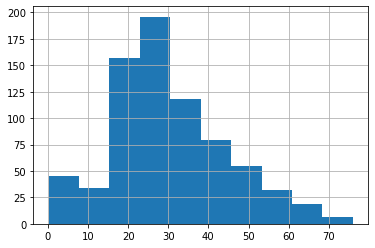

In [9]:
train['age'].hist()

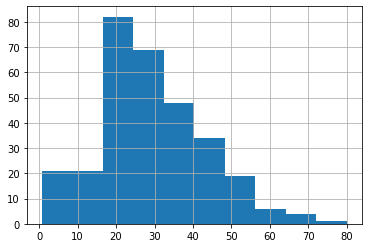

In [10]:
test['age'].hist()

In [11]:
# Age data is not normally distributed. Use median instead of mean.
age_fill = train['age'].median()
train['age'].fillna(age_fill, inplace=True)
test['age'].fillna(age_fill, inplace=True)

C:\Users\aldiem\Anaconda3\envs\ai-intro\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [12]:
train['cabin'].unique()

array(['E44', nan, 'B57 B59 B63 B66', 'C106', 'C49', 'B4', 'D46',
       'D10 D12', 'B73', 'C83', 'F38', 'C6', 'B41', 'C86', 'D34', 'F2',
       'C128', 'E101', 'F4', 'G6', 'A36', 'C54', 'E40', 'D17', 'C52',
       'C23 C25 C27', 'E31', 'B50', 'C65', 'B51 B53 B55', 'B37', 'D20',
       'F33', 'C22 C26', 'E49', 'D43', 'A16', 'D15', 'D28', 'C70', 'B19',
       'C93', 'D6', 'B58 B60', 'C32', 'A34', 'C78', 'C46', 'B52 B54 B56',
       'C55 C57', 'C92', 'B20', 'C99', 'D49', 'C31', 'C116', 'E25', 'C45',
       'D', 'C30', 'D9', 'D11', 'B69', 'B102', 'A29', 'A5', 'A11', 'E121',
       'B78', 'C104', 'C82', 'C50', 'C130', 'B38', 'C87', 'D26', 'A18',
       'C124', 'D35', 'E67', 'E34', 'F G73', 'E17', 'F', 'C126', 'C97',
       'B101', 'B80', 'B86', 'C28', 'A20', 'C68', 'A6', 'E10', 'C91',
       'C62 C64', 'E45', 'C89', 'C125', 'B26', 'C53', 'C123', 'C105',
       'D48', 'D30', 'A19', 'B36', 'D7', 'E46', 'C148', 'C80', 'F G63',
       'B42', 'B82 B84', 'A31', 'D36', 'B77', 'E39 E41', 'C132', '

In [13]:
# Cabin data has lots of missing values and they are almost unique - drop them.
# Note: It could be useful to keep the cabin category letters, but we will
# ignore them here.

In [14]:
train.drop(columns=['cabin'], inplace=True)
test.drop(columns=['cabin'], inplace=True)

C:\Users\aldiem\Anaconda3\envs\ai-intro\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
# Embarked only has 2 missing values in the training data set - let's check them
train[train['embarked'].isnull()]

,pclass,survived,sex,age,sibsp,parch,fare,embarked
168,1,1,female,38.0,0,0,80.0,NaN


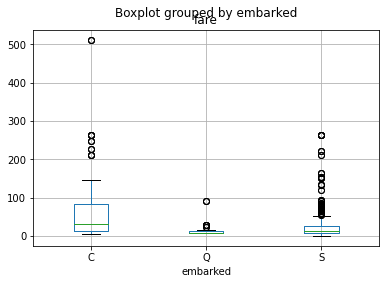

In [16]:
train.boxplot(by='embarked', column=['fare'])

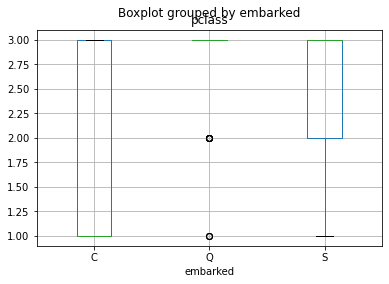

In [17]:
train.boxplot(by='embarked', column=['pclass'])

In [18]:
train['embarked'].fillna('C', inplace=True)

C:\Users\aldiem\Anaconda3\envs\ai-intro\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [19]:
train.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        1
embarked    0
dtype: int64

In [20]:
test.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    1
dtype: int64

In [21]:
train[train['fare'].isnull()]

,pclass,survived,sex,age,sibsp,parch,fare,embarked
1225,3,0,male,60.5,0,0,NaN,S


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002108D6382E0>,
      dtype=object)

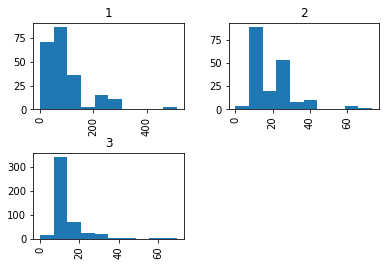

In [22]:
train['fare'].hist(by=train['pclass'])

In [23]:
train[train['pclass'] == 3]['fare'].mean()

12.794821843687373

In [24]:
train[train['pclass'] == 3]['fare'].median()

7.925

In [25]:
train['fare'].fillna(train[train['pclass'] == 3]['fare'].median(), inplace=True)

C:\Users\aldiem\Anaconda3\envs\ai-intro\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [26]:
train.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

## Encode categorical data

In [27]:
# categorical data with two values
train['sex'] = train['sex'].astype('category')
train['sex_cat'] = train['sex'].cat.codes
test['sex'] = test['sex'].astype('category')
test['sex_cat'] = test['sex'].cat.codes

<ipython-input-27-eba69cfc8bf7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['sex'] = train['sex'].astype('category')
<ipython-input-27-eba69cfc8bf7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['sex_cat'] = train['sex'].cat.codes
<ipython-input-27-eba69cfc8bf7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [28]:
# categorical data with more than two values
# require one-hot encoding
embarked_dummy = pd.get_dummies(train['embarked'], prefix='embarked')
train = pd.concat([train, embarked_dummy], axis=1)
embarked_dummy = pd.get_dummies(test['embarked'], prefix='embarked')
test = pd.concat([test, embarked_dummy], axis=1)

pclass_dummy = pd.get_dummies(train['pclass'], prefix='pclass')
train = pd.concat([train, pclass_dummy], axis=1)
pclass_dummy = pd.get_dummies(test['pclass'], prefix='pclass')
test = pd.concat([test, pclass_dummy], axis=1)

## Visualisation

In [29]:
train.describe()

,pclass,survived,age,sibsp,parch,fare,sex_cat,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,2.300218,0.381004,29.662576,0.508734,0.389738,34.503829,0.643013,0.212882,0.094978,0.692140,0.245633,0.208515,0.545852
std,0.837926,0.485899,13.116192,1.004324,0.855623,54.285059,0.479373,0.409569,0.293345,0.461861,0.430697,0.406469,0.498165
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002108D2AF2B0>,
      dtype=object)

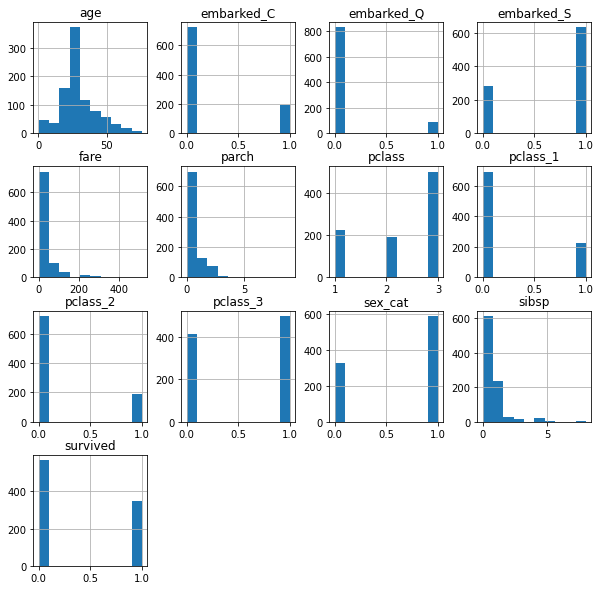

In [30]:
train.hist(figsize=(10,10))

In [31]:
# Spearman correlation because variables are not normally distributed (apart from age)
corr = train.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,pclass,survived,age,sibsp,parch,fare,sex_cat,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3
pclass,1.00,-0.34,-0.33,-0.10,-0.05,-0.73,0.20,-0.28,0.22,0.11,-0.83,-0.30,0.96
survived,-0.34,1.00,-0.03,0.08,0.17,0.31,-0.53,0.19,-0.03,-0.15,0.29,0.10,-0.33
age,-0.33,-0.03,1.00,-0.11,-0.19,0.17,0.03,0.08,-0.00,-0.07,0.34,-0.01,-0.28
sibsp,-0.10,0.08,-0.11,1.00,0.45,0.45,-0.19,0.01,-0.08,0.04,0.09,0.02,-0.09
parch,-0.05,0.17,-0.19,0.45,1.00,0.41,-0.26,0.01,-0.12,0.07,0.03,0.03,-0.05
fare,-0.73,0.31,0.17,0.45,0.41,1.00,-0.30,0.23,-0.24,-0.05,0.67,0.10,-0.66
sex_cat,0.20,-0.53,0.03,-0.19,-0.26,-0.30,1.00,-0.08,-0.07,0.12,-0.16,-0.07,0.19
embarked_C,-0.28,0.19,0.08,0.01,0.01,0.23,-0.08,1.00,-0.17,-0.78,0.38,-0.17,-0.19
embarked_Q,0.22,-0.03,-0.00,-0.08,-0.12,-0.24,-0.07,-0.17,1.00,-0.49,-0.16,-0.11,0.23
embarked_S,0.11,-0.15,-0.07,0.04,0.07,-0.05,0.12,-0.78,-0.49,1.00,-0.23,0.22,0.02


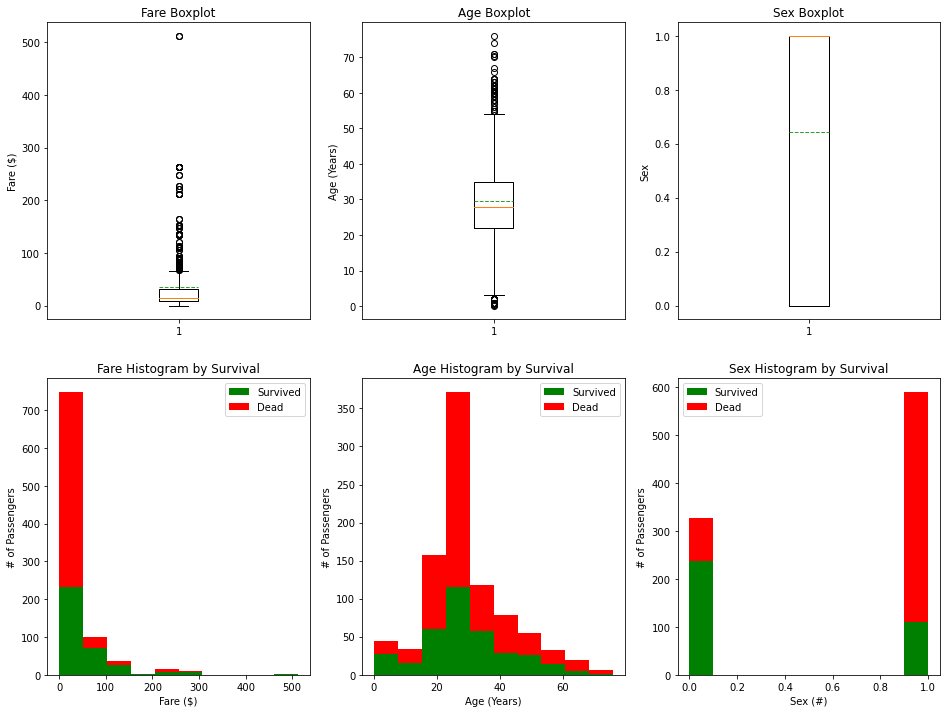

In [32]:
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=train['fare'], showmeans=True, meanline=True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(train['age'], showmeans=True, meanline=True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(train['sex_cat'], showmeans=True, meanline=True)
plt.title('Sex Boxplot')
plt.ylabel('Sex')

plt.subplot(234)
plt.hist(x=[train[train['survived'] == 1]['fare'], train[train['survived'] == 0]['fare']], 
         stacked=True, color=['g', 'r'], label=['Survived', 'Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x=[train[train['survived'] == 1]['age'], train[train['survived'] == 0]['age']], 
         stacked=True, color=['g', 'r'], label=['Survived', 'Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x=[train[train['survived'] == 1]['sex_cat'], train[train['survived'] == 0]['sex_cat']], 
         stacked=True, color=['g', 'r'], label=['Survived', 'Dead'])
plt.title('Sex Histogram by Survival')
plt.xlabel('Sex (#)')
plt.ylabel('# of Passengers')
plt.legend()

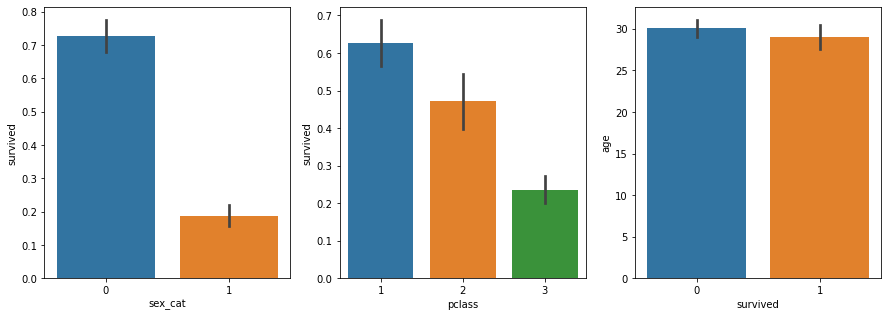

In [33]:
fig, saxis = plt.subplots(1, 3, figsize=(15,5))

sns.barplot(x='sex_cat', y='survived', data=train, ax=saxis[0])
sns.barplot(x='pclass', y='survived', order=[1,2,3], data=train, ax=saxis[1])
sns.barplot(x='survived', y='age', order=[0, 1], data=train, ax=saxis[2])

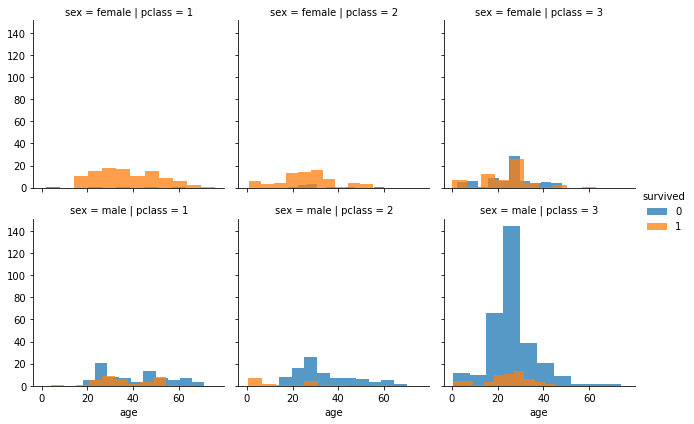

In [34]:
#histogram comparison of sex, class, and age by survival
h = sns.FacetGrid(train, row='sex', col='pclass', hue='survived')
h.map(plt.hist, 'age', alpha=.75)
h.add_legend()

## "Naive" machine learning

Let's "just use machine learning" - no statistical data treatment.

In [35]:
from sklearn.neighbors import KNeighborsClassifier
train_y = train['survived']
train_X = train[['age', 'sibsp', 'parch', 'fare', 'sex_cat', 
                 'embarked_C', 'embarked_S', 'embarked_Q', 
                 'pclass_1', 'pclass_2', 'pclass_3']]
test_y = test['survived']
test_X = test[['age', 'sibsp', 'parch', 'fare', 'sex_cat', 
               'embarked_C', 'embarked_S', 'embarked_Q', 
               'pclass_1', 'pclass_2', 'pclass_3']]
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_X, train_y)
knn.score(test_X, test_y)

0.6921119592875318

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(train_X, train_y)
rfc.score(test_X, test_y)

0.7582697201017812

In [37]:
test.describe()

,pclass,survived,age,sibsp,parch,fare,sex_cat,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3
count,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.00000,393.000000
mean,2.282443,0.384224,29.131679,0.475827,0.374046,30.414515,0.646310,0.193384,0.091603,0.712468,0.249364,0.21883,0.531807
std,0.838562,0.487031,12.408039,1.124881,0.889300,45.205337,0.478724,0.395455,0.288832,0.453189,0.433196,0.41398,0.499623
min,1.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2.000000,0.000000,23.000000,0.000000,0.000000,7.925000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.500000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.683300,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


## Normalise numerical values

In [38]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
train[['age', 'sibsp', 'parch', 'fare']] = scaler.fit_transform(train[['age', 'sibsp', 'parch', 'fare']])
test[['age', 'sibsp', 'parch', 'fare']] = scaler.fit_transform(test[['age', 'sibsp', 'parch', 'fare']])

In [39]:
train.describe()

,pclass,survived,age,sibsp,parch,fare,sex_cat,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,2.300218,0.381004,0.388930,0.063592,0.043304,0.067347,0.643013,0.212882,0.094978,0.692140,0.245633,0.208515,0.545852
std,0.837926,0.485899,0.172968,0.125541,0.095069,0.105957,0.479373,0.409569,0.293345,0.461861,0.430697,0.406469,0.498165
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.287881,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.367005,0.000000,0.000000,0.028213,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,0.459317,0.125000,0.000000,0.060508,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
train_y = train['survived']
train_X = train[['age', 'sibsp', 'parch', 'fare', 'sex_cat', 
                 'embarked_C', 'embarked_S', 'embarked_Q', 
                 'pclass_1', 'pclass_2', 'pclass_3']]
test_y = test['survived']
test_X = test[['age', 'sibsp', 'parch', 'fare', 'sex_cat', 
               'embarked_C', 'embarked_S', 'embarked_Q', 
               'pclass_1', 'pclass_2', 'pclass_3']]

knn.fit(train_X, train_y)
knn.score(test_X, test_y)

0.7506361323155216

In [41]:
rfc.fit(train_X, train_y)
rfc.score(test_X, test_y)

0.7582697201017812

### Feature selection/engineering

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002108EFA99D0>,
      dtype=object)

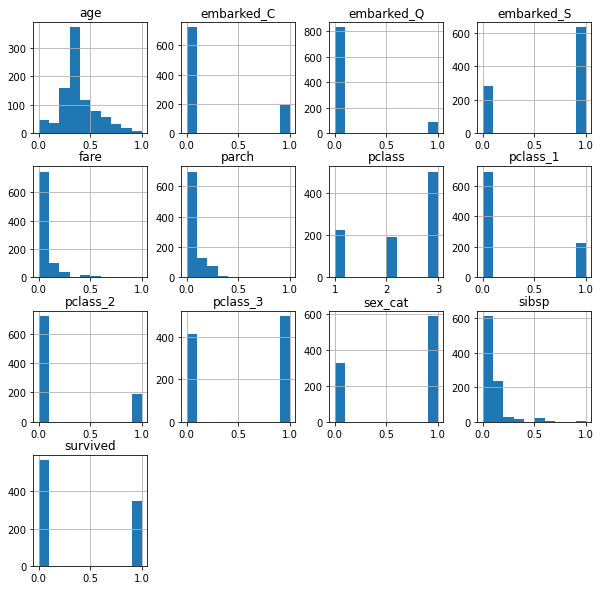

In [42]:
train.hist(figsize=(10,10))

In [43]:
# Spearman correlation because variables are not normally distributed (apart from age)
corr = train.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,pclass,survived,age,sibsp,parch,fare,sex_cat,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3
pclass,1.00,-0.34,-0.33,-0.10,-0.05,-0.73,0.20,-0.28,0.22,0.11,-0.83,-0.30,0.96
survived,-0.34,1.00,-0.03,0.08,0.17,0.31,-0.53,0.19,-0.03,-0.15,0.29,0.10,-0.33
age,-0.33,-0.03,1.00,-0.11,-0.19,0.17,0.03,0.08,-0.00,-0.07,0.34,-0.01,-0.28
sibsp,-0.10,0.08,-0.11,1.00,0.45,0.45,-0.19,0.01,-0.08,0.04,0.09,0.02,-0.09
parch,-0.05,0.17,-0.19,0.45,1.00,0.41,-0.26,0.01,-0.12,0.07,0.03,0.03,-0.05
fare,-0.73,0.31,0.17,0.45,0.41,1.00,-0.30,0.23,-0.24,-0.05,0.67,0.10,-0.66
sex_cat,0.20,-0.53,0.03,-0.19,-0.26,-0.30,1.00,-0.08,-0.07,0.12,-0.16,-0.07,0.19
embarked_C,-0.28,0.19,0.08,0.01,0.01,0.23,-0.08,1.00,-0.17,-0.78,0.38,-0.17,-0.19
embarked_Q,0.22,-0.03,-0.00,-0.08,-0.12,-0.24,-0.07,-0.17,1.00,-0.49,-0.16,-0.11,0.23
embarked_S,0.11,-0.15,-0.07,0.04,0.07,-0.05,0.12,-0.78,-0.49,1.00,-0.23,0.22,0.02


In [44]:
# Choose 5 highest correlation features
train_y = train['survived']
train_X = train[['sex_cat', 'pclass_3', 'pclass_1', 'fare', 'embarked_C']]
test_y = test['survived']
test_X = test[['sex_cat', 'pclass_3', 'pclass_1', 'fare', 'embarked_C']]

knn.fit(train_X, train_y)
knn.score(test_X, test_y)

0.7582697201017812

In [45]:
rfc.fit(train_X, train_y)
rfc.score(test_X, test_y)

0.7430025445292621

In [46]:
# Choose 5 highest correlation features
train_y = train['survived']
train_X = train[['sex_cat', 'pclass_3', 'pclass_1', 'embarked_C', 'parch']]
test_y = test['survived']
test_X = test[['sex_cat', 'pclass_3', 'pclass_1', 'embarked_C', 'parch']]

knn.fit(train_X, train_y)
knn.score(test_X, test_y)

0.7455470737913485

In [47]:
rfc.fit(train_X, train_y)
rfc.score(test_X, test_y)

0.7633587786259542

In [51]:
# Family size
train['family'] = train['sibsp'] + train['parch']
train[['family']] = scaler.fit_transform(train[['family']])
test['family'] = test['sibsp'] + test['parch']
test[['family']] = scaler.fit_transform(test[['family']])

In [52]:
corr = train.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,pclass,survived,age,sibsp,parch,fare,sex_cat,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3,family
pclass,1.00,-0.34,-0.33,-0.10,-0.05,-0.73,0.20,-0.28,0.22,0.11,-0.83,-0.30,0.96,-0.12
survived,-0.34,1.00,-0.03,0.08,0.17,0.31,-0.53,0.19,-0.03,-0.15,0.29,0.10,-0.33,0.16
age,-0.33,-0.03,1.00,-0.11,-0.19,0.17,0.03,0.08,-0.00,-0.07,0.34,-0.01,-0.28,-0.14
sibsp,-0.10,0.08,-0.11,1.00,0.45,0.45,-0.19,0.01,-0.08,0.04,0.09,0.02,-0.09,0.89
parch,-0.05,0.17,-0.19,0.45,1.00,0.41,-0.26,0.01,-0.12,0.07,0.03,0.03,-0.05,0.76
fare,-0.73,0.31,0.17,0.45,0.41,1.00,-0.30,0.23,-0.24,-0.05,0.67,0.10,-0.66,0.53
sex_cat,0.20,-0.53,0.03,-0.19,-0.26,-0.30,1.00,-0.08,-0.07,0.12,-0.16,-0.07,0.19,-0.28
embarked_C,-0.28,0.19,0.08,0.01,0.01,0.23,-0.08,1.00,-0.17,-0.78,0.38,-0.17,-0.19,0.03
embarked_Q,0.22,-0.03,-0.00,-0.08,-0.12,-0.24,-0.07,-0.17,1.00,-0.49,-0.16,-0.11,0.23,-0.12
embarked_S,0.11,-0.15,-0.07,0.04,0.07,-0.05,0.12,-0.78,-0.49,1.00,-0.23,0.22,0.02,0.05


In [58]:
train_y = train['survived']
train_X = train[['sex_cat', 'pclass_1', 'pclass_3', 'embarked_C', 'parch']]
test_y = test['survived']
test_X = test[['sex_cat', 'pclass_1', 'pclass_3', 'embarked_C', 'parch']]

knn.fit(train_X, train_y)
knn.score(test_X, test_y)

0.7531806615776081

In [59]:
rfc.fit(train_X, train_y)
rfc.score(test_X, test_y)

0.7608142493638677

## Test all the models at once

In [94]:
from sklearn import neural_network, gaussian_process, neighbors, svm, tree, ensemble, naive_bayes, discriminant_analysis
from sklearn.metrics import classification_report

estimators = [
    # Neural Network: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neural_network
    neural_network.MLPClassifier(),
    
    # Gaussian Processes: http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc
    gaussian_process.GaussianProcessClassifier(),
    
    # Nearest Neighbor: http://scikit-learn.org/stable/modules/neighbors.html
    neighbors.KNeighborsClassifier(),
    
    # SVM: http://scikit-learn.org/stable/modules/svm.html
    svm.SVC(probability=True),
    
    # Decision Tree: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree
    tree.DecisionTreeClassifier(),
    
    # Ensemble: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble
    ensemble.RandomForestClassifier(),
    ensemble.AdaBoostClassifier(),
    
    # Navies Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html
    naive_bayes.GaussianNB(),
    
    # Discriminant Analysis: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.discriminant_analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
]

for estimator in estimators:
    estimator.fit(train_X, train_y)
    print(estimator, estimator.score(train_X, train_y))
    pred_y = estimator.predict(test_X)
    print(classification_report(test_y, pred_y))

C:\Users\aldiem\Anaconda3\envs\ai-intro\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier() 0.7991266375545851
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       249
           1       0.77      0.62      0.69       144

    accuracy                           0.79       393
   macro avg       0.79      0.76      0.77       393
weighted avg       0.79      0.79      0.79       393

GaussianProcessClassifier() 0.8002183406113537
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       249
           1       0.78      0.62      0.69       144

    accuracy                           0.80       393
   macro avg       0.79      0.76      0.77       393
weighted avg       0.79      0.80      0.79       393

KNeighborsClassifier() 0.7936681222707423
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       249
           1       0.71      0.51      0.60       144

    accuracy                           0.75       393
   m

In [101]:
from sklearn import neural_network, gaussian_process, neighbors, svm, tree, ensemble, naive_bayes, discriminant_analysis
from sklearn.gaussian_process.kernels import RBF

estimators = [
    # Neural Network: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neural_network
    neural_network.MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(50,50), random_state=0, max_iter=1000),
    
    # Gaussian Processes: http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc
    gaussian_process.GaussianProcessClassifier(1.0 * RBF(1.0)),
    
    # Nearest Neighbor: http://scikit-learn.org/stable/modules/neighbors.html
    neighbors.KNeighborsClassifier(3),
    
    # SVM: http://scikit-learn.org/stable/modules/svm.html
    svm.SVC(kernel = 'rbf', probability=True),
    svm.SVC(probability=True, gamma=2, C=1),
    
    # Decision Tree: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree
    tree.DecisionTreeClassifier(max_depth=4, criterion='gini'),
    
    # Ensemble: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble
    ensemble.RandomForestClassifier(max_depth=4, n_estimators=10),
    ensemble.AdaBoostClassifier(),
    
    # Navies Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html
    naive_bayes.GaussianNB(),
    
    # Discriminant Analysis: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.discriminant_analysis
    discriminant_analysis.LinearDiscriminantAnalysis(solver='lsqr'),
]

for estimator in estimators:
    estimator.fit(train_X, train_y)
    print(estimator, estimator.score(train_X, train_y))
    pred_y = estimator.predict(test_X)
    print(classification_report(test_y, pred_y))

C:\Users\aldiem\Anaconda3\envs\ai-intro\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(50, 50), max_iter=1000,
              random_state=0, solver='lbfgs') 0.8209606986899564
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       249
           1       0.72      0.65      0.68       144

    accuracy                           0.78       393
   macro avg       0.76      0.75      0.76       393
weighted avg       0.78      0.78      0.78       393

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1)) 0.8002183406113537
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       249
           1       0.77      0.62      0.69       144

    accuracy                           0.79       393
   macro avg       0.79      0.76      0.77       393
weighted avg       0.79      0.79      0.79       393

KNeighborsClassifier(n_neighbors=3) 0.8133187772925764
              precision    recall  f1-score   support

           0       0